In [161]:
import csv
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
import math
from scipy import stats
from collections import Counter, defaultdict
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [10, 5]
import pandas as pd


In [12]:
def read_csv(fname: str) -> List[List[str]]:
	data = []
	with open(fname, 'r') as csvfile:
	    spamreader = csv.reader(csvfile)
	    for row in spamreader:
	    	data.append(row)
	return data

In [177]:
data = read_csv('half_2021.csv')
datapd = pd.DataFrame(data[1:], columns=data[0])
datapd

,Place,Race,Race Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade
0,1,second,1,Dominic Henriques,"Reno, NV",152,1:09:40,5:19,M 35-39/1,M-35,1,1:09:40,84.29%
1,2,second,2,Collin Smith,"Sacramento, CA",151,1:09:42,5:19,M 30-34/1,M-31,2,1:09:42,83.82%
2,3,second,3,Eric Jones,"Sacramento, CA",153,1:09:51,5:20,M 25-29/1,M-26,3,1:09:51,83.64%
3,4,second,4,Edward Carrillo,"Murrieta, CA",16077,1:13:40,5:38,M 25-29/2,M-27,4,1:13:42,79.27%
4,5,second,5,Justice Skolnik,"San Rafael, CA",16083,1:15:02,5:44,M 20-24/1,M-24,5,1:15:15,77.83%
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,5108,second,1805,Raji Antoun,"Fort Lauderdale, FL",19122,4:00:53,18:23,M 65-69/11,M-68,920,4:15:37,32.06%
5108,5109,first,3304,Priscilla McKerry,"Peoria, AZ",14347,4:03:56,18:37,F 50-54/90,F-50,1564,4:08:48,30.40%
5109,5110,first,3305,Sheetal Kasliwal,"San Ramon, CA",10958,4:07:49,18:55,M 50-54/107,M-50,1741,4:12:20,26.29%
5110,5111,second,1806,Rita Woodfin,"Petaluma, CA",19765,4:37:47,21:12,F 55-59/30,F-58,886,4:37:47,29.52%


In [145]:
# 7 unknown runner with bad age data
[x for x in data[1:] if x[5] in ['14168', '11703', '9084', '3670', '8360', '16994', '6439']]

[['278',
  'first',
  '133',
  'Unknown Runner-Reg',
  ', ',
  '14168',
  '1:40:14',
  '7:39',
  'M NoAge/0',
  'M-0',
  '112',
  '1:54:02',
  ' 0.00%'],
 ['1328',
  'first',
  '801',
  'Unknown Runner-Reg',
  ', ',
  '11703',
  '1:59:16',
  '9:06',
  'M NoAge/0',
  'M-0',
  '584',
  '2:13:54',
  ' 0.00%'],
 ['3516',
  'first',
  '2228',
  'Unknown Runner-Reg',
  ', ',
  '9084',
  '2:29:54',
  '11:27',
  'M NoAge/0',
  'M-0',
  '1318',
  '2:52:51',
  ' 0.00%'],
 ['4248',
  'first',
  '2733',
  'Unknown Runner-Reg',
  ', ',
  '3670',
  '2:45:01',
  '12:36',
  'M NoAge/0',
  'M-0',
  '1534',
  '2:54:06',
  ' 0.00%'],
 ['4598',
  'first',
  '2979',
  'Unknown Runner-Reg',
  ', ',
  '8360',
  '2:55:33',
  '13:24',
  'M NoAge/0',
  'M-0',
  '1623',
  '3:05:53',
  ' 0.00%'],
 ['4943',
  'first',
  '3204',
  'Unknown Runner-Reg',
  ', ',
  '16994',
  '3:15:41',
  '14:56',
  'M NoAge/0',
  'M-0',
  '1703',
  '3:23:04',
  ' 0.00%'],
 ['5039',
  'first',
  '3263',
  'Unknown Runner-Reg',
  ', ',

In [8]:
len(data), data[:2]

(5113,
 [['Place',
   'Race',
   'Race Place',
   'Name',
   'Location',
   'Bib',
   'Net Time',
   'Pace',
   'Division/Place',
   'Sex-Age',
   'Sex-Place',
   'Gun Time',
   'Age Grade'],
  ['1',
   'second',
   '1',
   'Dominic Henriques',
   'Reno, NV',
   '152',
   '1:09:40',
   '5:19',
   'M 35-39/1',
   'M-35',
   '1',
   '1:09:40',
   '84.29%']])

In [58]:
times = [x[6] for x in data[1:]]
def time_to_mins(time: str) -> int:
    t = datetime.strptime(time,"%H:%M:%S")
    delta = timedelta(hours=t.hour, minutes=t.minute, seconds=t.second).total_seconds()
    return delta/60
def min_to_time(mins: int) -> str:
    td = timedelta(hours=math.floor(mins/60), minutes=math.floor(mins%60), seconds=round(60*(mins%1)))
    return str(td)
times_mins = [time_to_mins(t) for t in times]
times_mins[:10]

[69.66666666666667,
 69.7,
 69.85,
 73.66666666666667,
 75.03333333333333,
 75.58333333333333,
 76.1,
 77.25,
 77.65,
 77.65]

<AxesSubplot:ylabel='Count'>

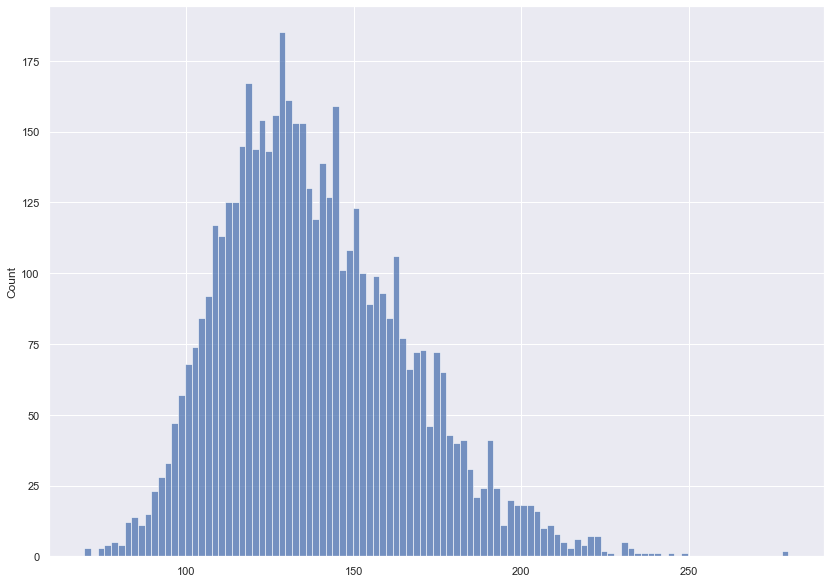

In [154]:
sns.histplot(times_mins, binwidth=2)

In [59]:
print(f'Total: {len(times_mins)}')
print(f'Median: {min_to_time(np.median(times_mins))}')
print(f'Mean: {min_to_time(np.mean(times_mins))}')
print(f'Min: {min_to_time(np.min(times_mins))}')
print(f'Max: {min_to_time(np.max(times_mins))}')

Total: 5112
Median: 2:14:51
Mean: 2:18:34
Min: 1:09:40
Max: 4:37:50


In [66]:
for i in range(0, 101, 10):
    print(f'{100-i}% Percentile: {min_to_time(np.percentile(times_mins, i))}')


100% Percentile: 1:09:40
90% Percentile: 1:46:16
80% Percentile: 1:55:14
70% Percentile: 2:01:54
60% Percentile: 2:08:33
50% Percentile: 2:14:51
40% Percentile: 2:22:34
30% Percentile: 2:30:47
20% Percentile: 2:41:41
10% Percentile: 2:55:38
0% Percentile: 4:37:50


In [75]:
for i in range(60, 240 + 1, 15):
    print(f'{min_to_time(i)}: {100-stats.percentileofscore(times_mins, i):0.2f}% Percentile')

1:00:00: 100.00% Percentile
1:15:00: 99.92% Percentile
1:30:00: 98.51% Percentile
1:45:00: 91.11% Percentile
2:00:00: 72.76% Percentile
2:15:00: 49.76% Percentile
2:30:00: 30.98% Percentile
2:45:00: 16.92% Percentile
3:00:00: 7.82% Percentile
3:15:00: 3.38% Percentile
3:30:00: 1.13% Percentile
3:45:00: 0.33% Percentile
4:00:00: 0.10% Percentile


In [80]:
Counter([x[3].split()[0] for x in data[1:]]).most_common(50)

[('Michael', 54),
 ('David', 35),
 ('Daniel', 35),
 ('Jennifer', 34),
 ('Matthew', 30),
 ('James', 29),
 ('Andrew', 29),
 ('Jessica', 28),
 ('Kevin', 27),
 ('John', 27),
 ('Eric', 26),
 ('Ryan', 26),
 ('Emily', 26),
 ('Sarah', 25),
 ('Michelle', 25),
 ('Christopher', 21),
 ('Joseph', 21),
 ('Brian', 21),
 ('Maria', 21),
 ('Robert', 20),
 ('Alex', 20),
 ('Elizabeth', 19),
 ('Jonathan', 19),
 ('Thomas', 19),
 ('Laura', 19),
 ('Richard', 19),
 ('Adam', 18),
 ('Jason', 18),
 ('Mark', 18),
 ('Paul', 18),
 ('Lisa', 18),
 ('Luis', 17),
 ('Chris', 16),
 ('Patrick', 16),
 ('Alexander', 16),
 ('Justin', 16),
 ('Stephanie', 16),
 ('Rachel', 16),
 ('Melissa', 16),
 ('Megan', 16),
 ('William', 15),
 ('Peter', 15),
 ('Kelly', 15),
 ('Karen', 15),
 ('Ana', 15),
 ('Nicole', 15),
 ('Katherine', 14),
 ('Joshua', 14),
 ('Charles', 14),
 ('Benjamin', 14)]

In [81]:
Counter([x[3].split()[-1] for x in data[1:]]).most_common(50)

[('Lee', 37),
 ('Chen', 29),
 ('Wang', 28),
 ('Nguyen', 27),
 ('Smith', 22),
 ('Kim', 19),
 ('Rodriguez', 19),
 ('Liu', 18),
 ('Singh', 18),
 ('Johnson', 17),
 ('Gonzalez', 17),
 ('Garcia', 17),
 ('Lin', 16),
 ('Miller', 15),
 ('Li', 15),
 ('Patel', 13),
 ('Lopez', 13),
 ('Yang', 13),
 ('Shah', 12),
 ('Brown', 12),
 ('Castillo', 12),
 ('Chang', 12),
 ('Tran', 12),
 ('Chan', 11),
 ('Peterson', 11),
 ('Wong', 11),
 ('Gupta', 11),
 ('Zhang', 10),
 ('Jimenez', 10),
 ('Wu', 10),
 ('Martinez', 10),
 ('Huang', 10),
 ('Thompson', 9),
 ('Martin', 9),
 ('Yu', 9),
 ('Sharma', 9),
 ('Perez', 9),
 ('Zhao', 9),
 ('Jones', 8),
 ('Aguilar', 8),
 ('Lam', 8),
 ('Wilson', 8),
 ('Gutierrez', 8),
 ('Sun', 8),
 ('Hsu', 8),
 ('Guzman', 8),
 ('Anderson', 8),
 ('Gomez', 8),
 ('Tang', 8),
 ('Lu', 8)]

In [90]:
[(x[3], x[4], x[6]) for x in data[1:] if x[3].split()[-1] in ['Gupta', 'Sharma', 'Shah', 'Patel', 'Singh', 'Das', 'Yadav']]

[('Hirsh Shah', 'San Francisco, CA', '1:24:37'),
 ('Hardik Patel', 'San Francisco, CA', '1:33:04'),
 ('Sumit Kumar Yadav', 'Mountain View, CA', '1:36:22'),
 ('Yash Patel', 'San Francisco, CA', '1:45:59'),
 ('Rakesh Sharma', 'San Francisco, CA', '1:53:31'),
 ('Harsh Patel', 'San Francisco, CA', '1:55:20'),
 ('Ravi Patel', 'Oakland, CA', '1:56:29'),
 ('Deshraj Yadav', 'Mountain View, CA', '1:59:13'),
 ('Saurav Das', 'San Francisco, CA', '2:00:51'),
 ('Debarghya Das', 'Mountain View, CA', '2:01:07'),
 ('Arvind Sharma', 'Mountain View, CA', '2:01:50'),
 ('Tejash Shah', 'San Francisco, CA', '2:02:23'),
 ('Jentel Das', 'San Jose, CA', '2:06:34'),
 ('Vatsal Shah', 'Union City, CA', '2:09:31'),
 ('Nihir Shah', 'Hillsborough, CA', '2:09:33'),
 ('Priyam J Patel', 'San Jose, CA', '2:10:11'),
 ('Pradyut Shah', 'San Francisco, CA', '2:10:11'),
 ('Jahnavi Singh', 'San Francisco, CA', '2:10:16'),
 ('Anjali Yadav', 'Saratoga, CA', '2:10:17'),
 ('Neha Singh', 'Oakland, CA', '2:11:06'),
 ('Sukanya Sharm

In [94]:
[(x[3], x[6]) for x in data[1:] ]

[('Dominic Henriques', '1:09:40'),
 ('Collin Smith', '1:09:42'),
 ('Eric Jones', '1:09:51'),
 ('Edward Carrillo', '1:13:40'),
 ('Justice Skolnik', '1:15:02'),
 ('James Timbrell', '1:15:35'),
 ('Michael Taylor', '1:16:06'),
 ('Phil Hebda', '1:17:15'),
 ('Ray Mason', '1:17:39'),
 ('Kevin Wood', '1:17:39'),
 ('Chris Carlson', '1:18:09'),
 ('Christopher Guerrero', '1:18:33'),
 ('Julia Vasquez', '1:18:33'),
 ('David Galvez', '1:19:18'),
 ('Ben Deland', '1:19:26'),
 ('Miles Bennett-Smith', '1:20:18'),
 ('Michael Ju', '1:20:26'),
 ('Santiago Arrangoiz-Arriola', '1:20:47'),
 ('Christian Armando Ledezma Cisneros', '1:21:39'),
 ('Wilson Hileman', '1:21:52'),
 ('Kosuke Amano', '1:21:54'),
 ('Nicholas Graves', '1:22:02'),
 ('Jeannette Mathieu', '1:22:05'),
 ('Sergio Solares', '1:22:26'),
 ('Korey Kuhl', '1:22:41'),
 ('Henri Romeo Patricio', '1:22:43'),
 ('Daniel Agostinelli', '1:22:45'),
 ('Marcus Aguilar', '1:22:51'),
 ('Matthew Metzger', '1:23:16'),
 ('Mary Kriege', '1:23:22'),
 ('Alan Thong', '

In [134]:
# Hari, Kurwa, Trikha, Yanthrawaduge, Goyal, Gogte, Dutta, Bista, Narayanan, Khera, Aswathanarayana, Varghese, Nyati, Manoj, Nandan, Shyamasundar, Jobanputra
sexage = [d[9].split('-') for d in data[1:]]
sex = [x[0] for x in sexage]
age = [int(x[1]) for x in sexage]

In [133]:
Counter(sex)

Counter({'M': 2661, 'F': 2451})

<AxesSubplot:ylabel='Count'>

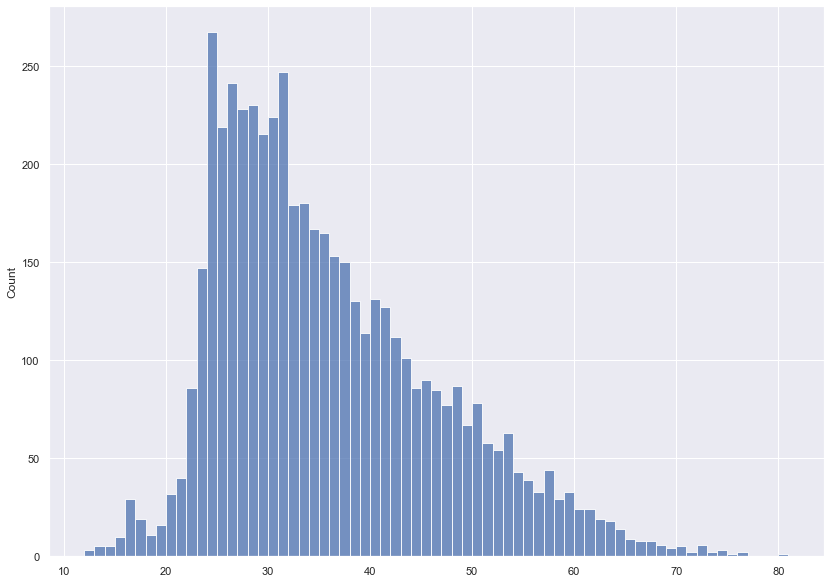

In [150]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')
sns.histplot([a for a in age if a > 10], binwidth=1)

In [160]:
Counter([math.floor(a/10) for a in age if a > 10]).most_common()
# < 24, 24-31, 32-40, 40-50, 50-60, 60-70, 70+

[(3, 1709), (2, 1705), (4, 963), (5, 474), (6, 134), (1, 98), (7, 21), (8, 1)]

In [163]:
timebucks = defaultdict(list)
for person in data[1:]:
    age = int(person[9].split('-')[1])
    timebucks[math.floor(age/10)].append(person)

In [170]:
for key, people in timebucks.items():
    print(key)

3
2
4
6
1
5
0
7
8


In [172]:
tips = sns.load_dataset("tips")
tips.__type__

AttributeError: 'DataFrame' object has no attribute '__type__'

In [179]:
datapd.describe()

,Place,Race,Race Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade
count,5112,5112,5112,5112,5112,5112,5112,5112,5112,5112,5112,5112,5112
unique,5112,2,3305,5096,626,5112,3368,615,3300,127,1741,3597,2638
top,1,first,1,Unknown Runner-Reg,"San Francisco, CA",152,2:00:36,10:04,M NoAge/0,M-31,1,2:21:11,38.13%
freq,1,3305,2,7,1609,1,7,27,7,140,4,6,9


In [186]:
datapd[datapd["Name"] == "Debarghya Das"]

,Place,Race,Race Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex-Age,Sex-Place,Gun Time,Age Grade
1475,1476,second,583,Debarghya Das,"Mountain View, CA",16058,2:01:07,9:15,M 25-29/96,M-28,397,2:02:32,48.21%


In [268]:
datanew = []
for d in data:
    sex, age = d[9].split('-')[0], d[9].split('-')[1]
    if age != 'Age':
        age = int(age)
    datanew.append(d[:9] + [sex, age] + d[10:])
datanew2 = []
for i, d in enumerate(datanew):
    category = d[8].split('/')[0]
    state = d[4].split(', ')[-1]
    country = 'USA'
    city = 'n/a'
    if state == '':
        country = d[4].split(', ')[0]
    else: 
        city = d[4].split(', ')[0]
    if i == 0:
        datanew2.append(d + ['Time Mins', 'Category', 'State', 'Country', 'City'])
    else:
        datanew2.append(d + [time_to_mins(d[6]), category, state, country, city])
datapd = pd.DataFrame(datanew2[1:], columns=datanew2[0])
datapd

,Place,Race,Race Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex,Age,Sex-Place,Gun Time,Age Grade,Time Mins,Category,State,Country,City
0,1,second,1,Dominic Henriques,"Reno, NV",152,1:09:40,5:19,M 35-39/1,M,35,1,1:09:40,84.29%,69.666667,M 35-39,NV,USA,Reno
1,2,second,2,Collin Smith,"Sacramento, CA",151,1:09:42,5:19,M 30-34/1,M,31,2,1:09:42,83.82%,69.700000,M 30-34,CA,USA,Sacramento
2,3,second,3,Eric Jones,"Sacramento, CA",153,1:09:51,5:20,M 25-29/1,M,26,3,1:09:51,83.64%,69.850000,M 25-29,CA,USA,Sacramento
3,4,second,4,Edward Carrillo,"Murrieta, CA",16077,1:13:40,5:38,M 25-29/2,M,27,4,1:13:42,79.27%,73.666667,M 25-29,CA,USA,Murrieta
4,5,second,5,Justice Skolnik,"San Rafael, CA",16083,1:15:02,5:44,M 20-24/1,M,24,5,1:15:15,77.83%,75.033333,M 20-24,CA,USA,San Rafael
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,5108,second,1805,Raji Antoun,"Fort Lauderdale, FL",19122,4:00:53,18:23,M 65-69/11,M,68,920,4:15:37,32.06%,240.883333,M 65-69,FL,USA,Fort Lauderdale
5108,5109,first,3304,Priscilla McKerry,"Peoria, AZ",14347,4:03:56,18:37,F 50-54/90,F,50,1564,4:08:48,30.40%,243.933333,F 50-54,AZ,USA,Peoria
5109,5110,first,3305,Sheetal Kasliwal,"San Ramon, CA",10958,4:07:49,18:55,M 50-54/107,M,50,1741,4:12:20,26.29%,247.816667,M 50-54,CA,USA,San Ramon
5110,5111,second,1806,Rita Woodfin,"Petaluma, CA",19765,4:37:47,21:12,F 55-59/30,F,58,886,4:37:47,29.52%,277.783333,F 55-59,CA,USA,Petaluma


In [235]:
datapd.query('Age > 25 & Age < 30 & Sex == "F" & Location == "San Francisco, CA"').head(50)

,Place,Race,Race Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex,Age,Sex-Place,Gun Time,Age Grade
29,30,second,23,Mary Kriege,"San Francisco, CA",18913,1:23:22,6:22,F 25-29/2,F,28,3,1:23:22,78.27%
42,43,second,32,Sarah Gulli,"San Francisco, CA",16076,1:25:09,6:30,F 25-29/4,F,29,7,1:25:19,76.59%
50,51,second,35,Anna Marggraff,"San Francisco, CA",366,1:26:51,6:38,F 25-29/5,F,26,9,1:26:57,75.09%
57,58,second,41,Heather Cerney,"San Francisco, CA",18916,1:27:44,6:42,F 25-29/6,F,29,13,1:27:46,74.33%
127,128,second,80,Tiana Abdulmassih,"San Francisco, CA",164,1:34:25,7:13,F 25-29/7,F,28,21,1:34:25,69.07%
139,140,second,88,Robin Kutner,"San Francisco, CA",353,1:34:50,7:15,F 25-29/8,F,29,23,1:34:53,68.76%
158,159,second,96,Olivia Papa,"San Francisco, CA",16096,1:35:58,7:20,F 25-29/9,F,29,24,1:36:33,67.95%
194,195,second,108,Samantha Sloan,"San Francisco, CA",163,1:37:20,7:26,F 25-29/10,F,28,26,1:37:23,67.00%
206,207,second,114,Brynn Gitt,"San Francisco, CA",16125,1:37:55,7:29,F 25-29/11,F,28,27,1:38:18,66.60%
244,245,first,115,Kelley Buck,"San Francisco, CA",9653,1:39:07,7:34,F 25-29/4,F,26,17,1:39:31,65.79%


/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Age', ylabel='Time Mins'>

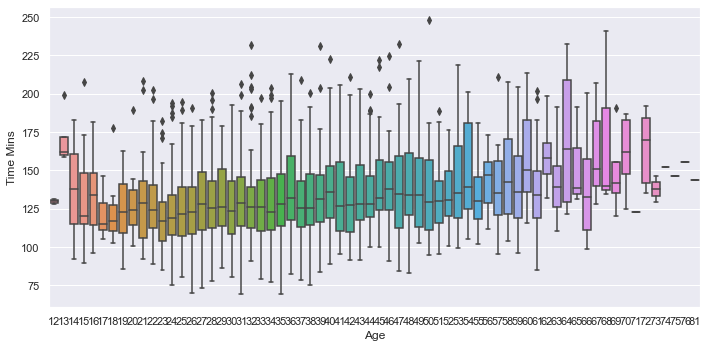

In [252]:
sns.boxplot(data=datapd[datapd['Sex']=='M'][datapd['Age']>10], x="Age", y="Time Mins")

In [253]:
datapd.query('Name == "Sumit Kumar Yadav"').head(50)

,Place,Race,Race Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex,Age,Sex-Place,Gun Time,Age Grade,Time Mins,Category
174,175,first,75,Sumit Kumar Yadav,"Mountain View, CA",11028,1:36:22,7:22,M 20-24/9,M,24,63,1:42:09,60.60%,96.366667,M 20-24


In [282]:
# 5112, 97.8% from USA
# 11 countries: Mexico (74), Colombia (12), Canada (8), France(2), Hong Kong, Switzerland, Turkey, Mongolia(?), Argentina, Costa Rica, UK, Portugal, Saudi Arabia
Counter(datapd['Country']).most_common()

[('USA', 5000),
 ('MX', 74),
 ('CO', 12),
 ('CA', 8),
 ('', 7),
 ('FR', 2),
 ('HK', 1),
 ('CH', 1),
 ('TR', 1),
 ('MO', 1),
 ('AR', 1),
 ('CR', 1),
 ('GB', 1),
 ('PT', 1),
 ('SA', 1)]

In [278]:
# 42 states, mostly California (89%) (4453/5000)
# Texas, Florida, Washington, New York, Colorado, Oregon, Arizona, Illinois, Georgia, ...
Counter(datapd[datapd['Country'] == 'USA']['State']).most_common()

[('CA', 4453),
 ('TX', 62),
 ('FL', 54),
 ('WA', 42),
 ('NY', 36),
 ('CO', 33),
 ('OR', 31),
 ('N/a', 25),
 ('AZ', 22),
 ('IL', 20),
 ('GA', 19),
 ('NJ', 19),
 ('NV', 18),
 ('PA', 15),
 ('OH', 14),
 ('MA', 12),
 ('MI', 11),
 ('NC', 10),
 ('AL', 10),
 ('VA', 10),
 ('MD', 9),
 ('MT', 6),
 ('WI', 6),
 ('MO', 6),
 ('UT', 6),
 ('HI', 6),
 ('MN', 5),
 ('CT', 5),
 ('NM', 5),
 ('WY', 4),
 ('KY', 4),
 ('TN', 3),
 ('DC', 3),
 ('ID', 3),
 ('LA', 3),
 ('IN', 2),
 ('OK', 2),
 ('IA', 1),
 ('ME', 1),
 ('ND', 1),
 ('KS', 1),
 ('NH', 1),
 ('SC', 1)]

In [286]:
# 336 total cities in California, most common: San Francisco (1609/4453 = 36.1%)
# Others: San Jose (5.7%), Oakland (3.2%), Berkeley (2.7%), Sunnyvale (2.3%), Fremont (2.2%), San Mateo (1.9%)
# Mountain View (1.75%), Palo Alto (1.6%), Santa Clara (1.5%), Redwood City (1.2%)
# Total Bay Area: 1609 + 254 + 143+121+104+99+86+78+75+68+54+38+35+35+33+31+31+30+30+30 + 29+29+25+25+22+22+21+20+20+20+19+18+17
# ... = 3300 (75% Bay Area)
Counter(datapd[datapd['Country'] == 'USA'][datapd['State'] == 'CA']['City']).most_common(50)

/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


[('San Francisco', 1609),
 ('San Jose', 254),
 ('Oakland', 143),
 ('Berkeley', 121),
 ('Sunnyvale', 104),
 ('Fremont', 99),
 ('San Mateo', 86),
 ('Mountain View', 78),
 ('Palo Alto', 75),
 ('Santa Clara', 68),
 ('Redwood City', 54),
 ('Los Angeles', 54),
 ('Sacramento', 49),
 ('Walnut Creek', 38),
 ('Danville', 35),
 ('San Ramon', 35),
 ('Dublin', 33),
 ('Los Altos', 31),
 ('Cupertino', 31),
 ('Daly City', 30),
 ('Pleasanton', 30),
 ('Alameda', 30),
 ('South San Francisco', 29),
 ('Foster City', 29),
 ('San Diego', 29),
 ('San Rafael', 27),
 ('Menlo Park', 25),
 ('Milpitas', 25),
 ('Stockton', 23),
 ('West Menlo Park', 22),
 ('Burlingame', 22),
 ('Union City', 21),
 ('San Carlos', 20),
 ('Hayward', 20),
 ('Los Gatos', 20),
 ('Stanford', 19),
 ('Mill Valley', 18),
 ('Pacifica', 18),
 ('Campbell', 17),
 ('Pleasant Hill', 17),
 ('Lafayette', 17),
 ('Saratoga', 17),
 ('Livermore', 16),
 ('Belmont', 16),
 ('Sausalito', 16),
 ('Vacaville', 16),
 ('San Leandro', 16),
 ('Castro Valley', 16),
 

In [356]:
pd.set_option('display.max_rows', None)
# dd - 25/78
datapd[datapd['City'] == 'Mountain View']
# pd.reset_option('display.max_rows')

/Users/deedy/workspace/scio/python_scio/scio_env/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Place,Race,Race Place,Name,Location,Bib,Net Time,Pace,Division/Place,Sex,Age,Sex-Place,Gun Time,Age Grade,Time Mins,Category,State,Country,City
616,617,first,345,Nasha Zhai,"Mountain View, CA",12878,1:48:13,8:16,F 25-29/27,F,29,78,1:49:44,60.26%,108.216667,F 25-29,CA,USA,Mountain View
1273,1274,second,516,Ines Ayara,"Mountain View, CA",19172,1:58:34,9:03,F 20-24/28,F,23,161,2:18:03,55.00%,118.566667,F 20-24,CA,USA,Mountain View
1278,1279,first,762,Yui Sasajima,"Mountain View, CA",12868,1:58:37,9:03,F 20-24/40,F,24,203,2:18:17,54.97%,118.616667,F 20-24,CA,USA,Mountain View
1342,1343,second,535,Lisa Bergmann,"Mountain View, CA",16980,1:59:24,9:07,F 30-34/33,F,30,167,2:12:08,54.62%,119.400000,F 30-34,CA,USA,Mountain View
1706,1707,second,664,Amy Sun,"Mountain View, CA",16672,2:04:21,9:30,F 25-29/61,F,27,223,2:24:23,52.44%,124.350000,F 25-29,CA,USA,Mountain View
2039,2040,first,1274,Abby Cunniff,"Mountain View, CA",11072,2:08:29,9:49,F 25-29/122,F,26,416,2:20:37,50.75%,128.483333,F 25-29,CA,USA,Mountain View
2062,2063,second,774,Junko Hayashida,"Mountain View, CA",18537,2:08:44,9:50,F 30-34/52,F,34,277,2:18:29,51.00%,128.733333,F 30-34,CA,USA,Mountain View
2123,2124,second,793,Kei Shao Tikkanen,"Mountain View, CA",16567,2:09:24,9:53,F 25-29/82,F,26,286,2:23:23,50.39%,129.400000,F 25-29,CA,USA,Mountain View
2277,2278,first,1428,Marissa Szyslowski,"Mountain View, CA",12672,2:11:13,10:01,F 40-44/50,F,41,494,2:24:57,51.75%,131.216667,F 40-44,CA,USA,Mountain View
2647,2648,first,1676,Jellina Son,"Mountain View, CA",13621,2:16:05,10:23,F 25-29/167,F,28,617,2:37:18,47.92%,136.083333,F 25-29,CA,USA,Mountain View


In [309]:
1 - datapd.index[datapd['Name'] == 'Debarghya Das'][0] / len(datapd)

0.7114632237871674

In [316]:
base = datapd[datapd['City'] == 'Mountain View']
base = base.reset_index(drop=True)
1 - base.index[base['Name'] == 'Debarghya Das'][0] / len(base)

0.6923076923076923

In [317]:
base = datapd[datapd['State'] == 'CA']
base = base.reset_index(drop=True)
1 - base.index[base['Name'] == 'Debarghya Das'][0] / len(base)

0.7055917359083763

In [318]:
base = datapd[datapd['Sex'] == 'M']
base = base.reset_index(drop=True)
1 - base.index[base['Name'] == 'Debarghya Das'][0] / len(base)

0.6106726794438181

In [320]:
base = datapd[datapd['Category'] == 'M 25-29']
base = base.reset_index(drop=True)
1 - base.index[base['Name'] == 'Debarghya Das'][0] / len(base)

0.5612431444241317

<AxesSubplot:xlabel='Age', ylabel='Count'>

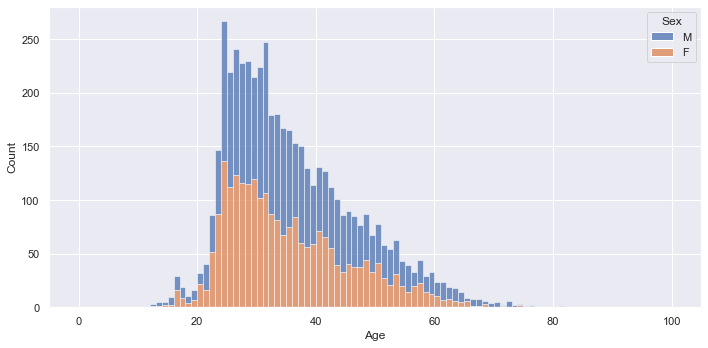

In [334]:
sns.histplot(datapd[datapd['Age'] >= 10], hue="Sex", x="Age", multiple='stack', stat='count', binwidth=1, binrange=[0,100])

<AxesSubplot:xlabel='Time Mins', ylabel='Count'>

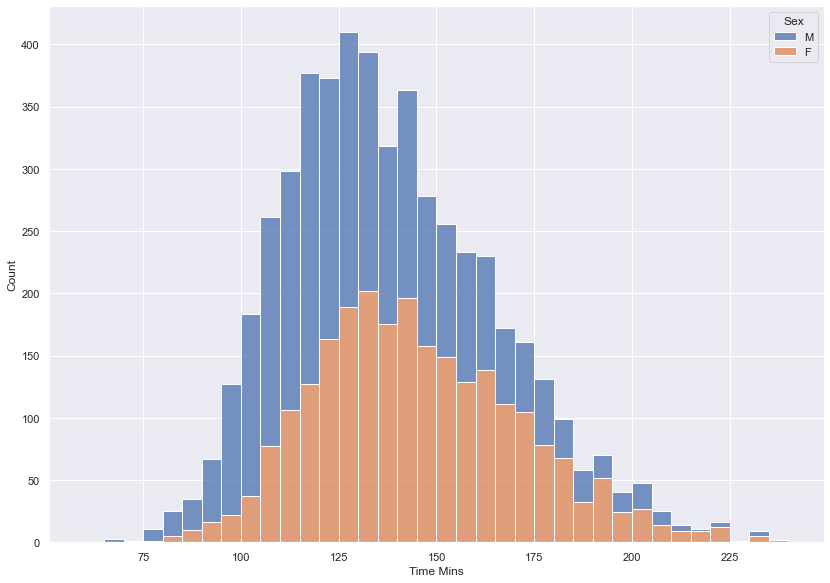

In [345]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(datapd[datapd['Age'] >= 10], hue="Sex", x="Time Mins", multiple='stack', stat='count', binwidth=5, binrange=[60,240])

<AxesSubplot:xlabel='Time Mins', ylabel='Count'>

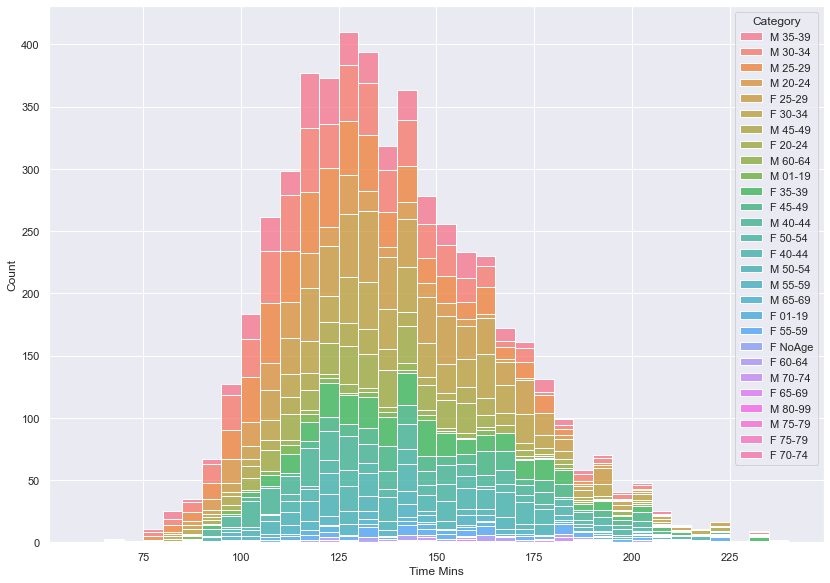

In [347]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.histplot(datapd[datapd['Age'] >= 10], hue="Category", x="Time Mins", multiple='stack', stat='count', binwidth=5, binrange=[60,240])


<AxesSubplot:xlabel='Age', ylabel='Time Mins'>

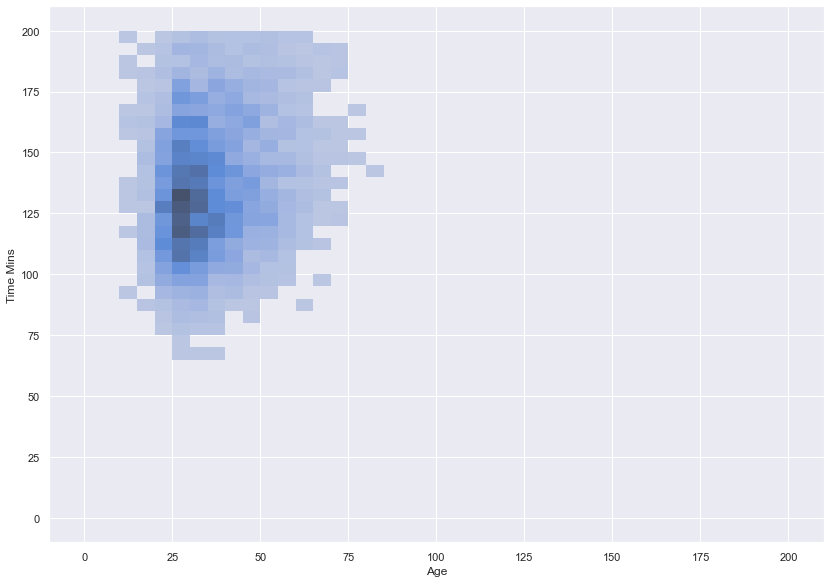

In [355]:
sns.histplot(datapd[datapd['Age'] >= 10], y="Time Mins", x="Age", binwidth=5, binrange=[0, 200])
